In [1]:
import sys
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [9]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [16]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]

In [12]:
dummies = pd.get_dummies(df[['Sex','BP', 'Cholesterol']], drop_first=True)

In [13]:
dummies

,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,0,0,0,0
1,1,1,0,0
2,1,1,0,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
195,0,1,0,0
196,1,1,0,0
197,1,0,1,0
198,1,0,1,1


In [19]:
X =X.drop(['Sex','BP', 'Cholesterol'],axis=1)

In [24]:
X = pd.concat([X,dummies], axis=1)

In [26]:
x

array([[23.   , 25.355,  0.   ,  0.   ,  0.   ,  0.   ],
       [47.   , 13.093,  1.   ,  1.   ,  0.   ,  0.   ],
       [47.   , 10.114,  1.   ,  1.   ,  0.   ,  0.   ],
       ...,
       [52.   ,  9.894,  1.   ,  0.   ,  1.   ,  0.   ],
       [23.   , 14.02 ,  1.   ,  0.   ,  1.   ,  1.   ],
       [40.   , 11.349,  0.   ,  1.   ,  0.   ,  1.   ]])

In [28]:
y = df['Drug']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)

In [31]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [32]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [33]:
predTree = drugTree.predict(X_testset)

In [35]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [36]:
 metrics.accuracy_score(y_testset, predTree)

0.9833333333333333

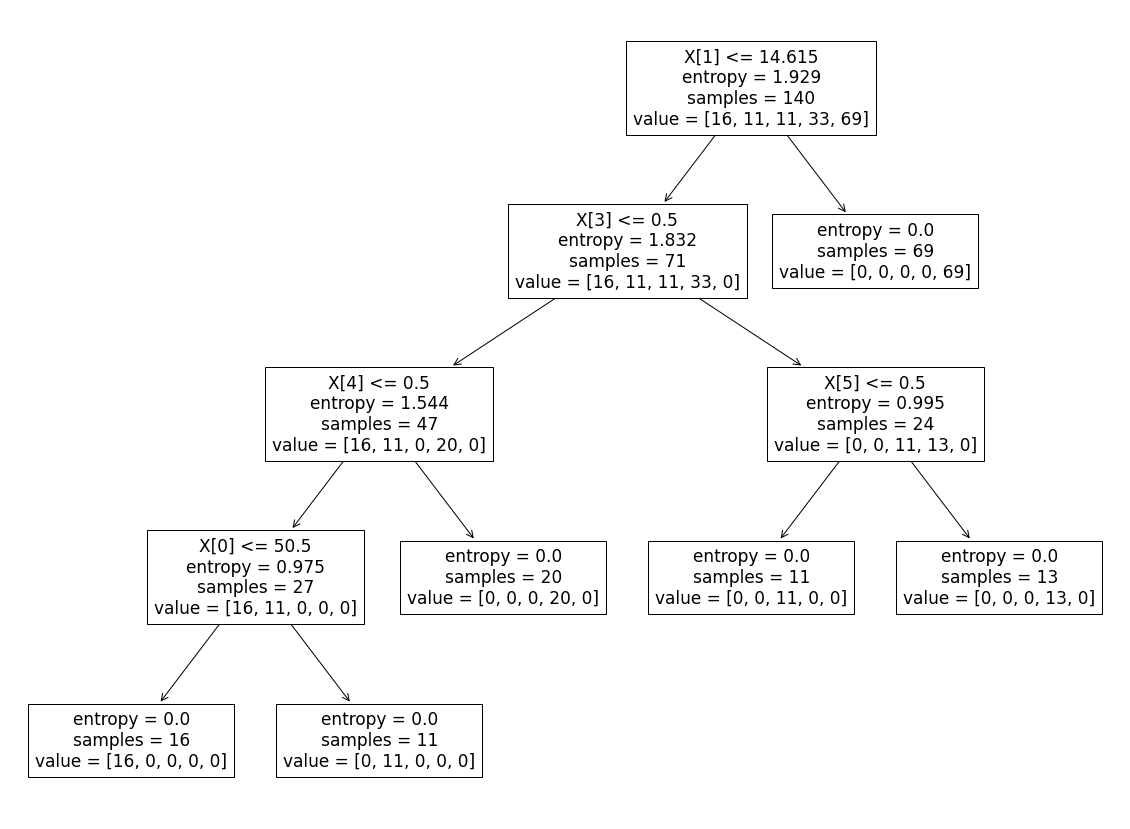

In [38]:
plt.figure(figsize=(20,15))
tree.plot_tree(drugTree)
plt.show()